# Kütüphanelerin ve Veri Setinin Yüklenmesi

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

data = pd.read_csv('dava_sonuclari.csv')
data.head()

,Case Type,Case Duration (Days),Judge Experience (Years),Number of Witnesses,Legal Fees (USD),Plaintiff's Reputation,Defendant's Wealth (USD),Number of Evidence Items,Number of Legal Precedents,Settlement Offered (USD),Severity,Outcome
0,Criminal,221,39,18,24306,2,663160,3,1,29014,1,0
1,Civil,212,14,1,42444,3,252011,67,4,21591,1,0
2,Civil,47,6,19,21418,1,307309,66,6,25530,3,0
3,Commercial,358,13,9,45005,3,285111,63,1,28470,1,0
4,Criminal,33,17,17,36315,2,84229,38,2,38244,2,0


# Veri Seti Hakkında Genel Bilgiler

* **Case Type:** Davanın türü (Criminal, Civil, Commercial)
* **Case Duration (Days):** Davanın süresi (gün olarak)  
* **Judge Experience (Years):** Hakimin deneyim yılı  
* **Number of Witnesses:** Tanık sayısı  
* **Legal Fees (USD):** Hukuk masrafları (USD olarak)
* **Plaintiff's Reputation:** Davacının itibarı (1: Düşük, 2: Orta, 3: Yüksek)
* **Defendant's Wealth (USD):** Davalının serveti
* **Number of Evidence Items:** Delil sayısı
* **Number of Legal Precedents:** İlgili hukuki emsal sayısı
* **Settlement Offered (USD):** Teklif edilen uzlaşma miktarı
* **Severity:** Davanın ciddiyet derecesi (1: Düşük, 2: Orta, 3: Yüksek)
* **Outcome:** Davanın sonucu (0: Kaybetmek, 1: Kazanmak)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   200 non-null    object
 1   Case Duration (Days)        200 non-null    int64 
 2   Judge Experience (Years)    200 non-null    int64 
 3   Number of Witnesses         200 non-null    int64 
 4   Legal Fees (USD)            200 non-null    int64 
 5   Plaintiff's Reputation      200 non-null    int64 
 6   Defendant's Wealth (USD)    200 non-null    int64 
 7   Number of Evidence Items    200 non-null    int64 
 8   Number of Legal Precedents  200 non-null    int64 
 9   Settlement Offered (USD)    200 non-null    int64 
 10  Severity                    200 non-null    int64 
 11  Outcome                     200 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 18.9+ KB


# Görevler

1. **Veri Ön İşleme:** 
    * Eksik veya aykırı değerleri kontrol edip gerekirse temizleyin.
    * Veri setini inceleyin ve eksik veya aykırı değerler olup olmadığını kontrol edin.
    * Gerektiğinde eksik verileri doldurun veya çıkarın.
    * Özelliklerin ölçeklendirilmesi gibi gerekli veri dönüşümlerini uygulayın. 
2. **Veri Setini Ayırma:** 
    * Veri setini eğitim ve test setleri olarak ayırın (örn. %80 eğitim, %20 test).
3. **Model Kurulumu:** 
    * Karar ağacı (Decision Tree) modelini oluşturun ve eğitim verileri üzerinde eğitin.
4. **Modeli Değerlendirme:**
    * Test verilerini kullanarak modelin doğruluğunu değerlendirin.
    * Doğruluk (accuracy), precision, recall ve F1-score gibi performans metriklerini hesaplayın.
5. **Sonuçları Görselleştirme:**
    * Karar ağacının yapısını görselleştirin.
    * Karar ağacının nasıl çalıştığını ve hangi özelliklerin davanın sonucunu belirlemede en etkili olduğunu açıklayın.

## 1.Görev: Veri Ön İşleme

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Case Type                   200 non-null    object
 1   Case Duration (Days)        200 non-null    int64 
 2   Judge Experience (Years)    200 non-null    int64 
 3   Number of Witnesses         200 non-null    int64 
 4   Legal Fees (USD)            200 non-null    int64 
 5   Plaintiff's Reputation      200 non-null    int64 
 6   Defendant's Wealth (USD)    200 non-null    int64 
 7   Number of Evidence Items    200 non-null    int64 
 8   Number of Legal Precedents  200 non-null    int64 
 9   Settlement Offered (USD)    200 non-null    int64 
 10  Severity                    200 non-null    int64 
 11  Outcome                     200 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 18.9+ KB
None


In [4]:
print(data['Outcome'].value_counts())

0    200
Name: Outcome, dtype: int64


In [5]:
print("--- Hedef Değişkeni 'Outcome' Oluşturma ---")
median_evidence = data['Number of Evidence Items'].median()
median_fees = data['Legal Fees (USD)'].median()

print(f"Delil Sayısı için Medyan Değeri (Eşik): {median_evidence}")
print(f"Hukuk Masrafları için Medyan Değeri (Eşik): {median_fees}\n")

--- Hedef Değişkeni 'Outcome' Oluşturma ---
Delil Sayısı için Medyan Değeri (Eşik): 45.5
Hukuk Masrafları için Medyan Değeri (Eşik): 27004.5



In [6]:
# Koşul 1: Delil sayısı, medyan delil sayısından yüksek mi?
condition1 = data['Number of Evidence Items'] > median_evidence
# Koşul 2: Hukuk masrafları, medyan masraftan yüksek mi?
condition2 = data['Legal Fees (USD)'] > median_fees
# Koşul 3: Davacı itibarı "Yüksek" (3) mü?
condition3 = data["Plaintiff's Reputation"] == 3

# Bu üç koşuldan en az biri doğru ise ( | = VEYA ), 'Outcome' değerini 1, değilse 0 yapıyoruz.
data['Outcome'] = (condition1 | condition2 | condition3).astype(int)

print("--- Yeni ve Anlamlı 'Outcome' Sütununun Dağılımı ---")
print(data['Outcome'].value_counts())
print("\n")

--- Yeni ve Anlamlı 'Outcome' Sütununun Dağılımı ---
1    161
0     39
Name: Outcome, dtype: int64




In [7]:
data = pd.get_dummies(data, columns=['Case Type'], drop_first=True)
print("Ön işleme sonrası veri setinin son hali (İlk 5 Satır):")
print(data.head())

Ön işleme sonrası veri setinin son hali (İlk 5 Satır):
   Case Duration (Days)  Judge Experience (Years)  Number of Witnesses  \
0                   221                        39                   18   
1                   212                        14                    1   
2                    47                         6                   19   
3                   358                        13                    9   
4                    33                        17                   17   

   Legal Fees (USD)  Plaintiff's Reputation  Defendant's Wealth (USD)  \
0             24306                       2                    663160   
1             42444                       3                    252011   
2             21418                       1                    307309   
3             45005                       3                    285111   
4             36315                       2                     84229   

   Number of Evidence Items  Number of Legal Precedents  \
0 

### Analiz ve Yorumlama

Bu bölümde, projenin en kritik adımlarından birini attık. İlk başta `dava_sonuclari.csv` dosyasını incelediğimizde, `Outcome` (sonuç) sütunundaki tüm değerlerin '0' olduğunu fark ettik. Bu durum, bir modelin "kazanma" durumunu öğrenmesini imkansız kılıyordu. Çünkü modelin elinde hiç "kazanılmış" dava örneği yoktu.

Bu sorunu çözmek için, `Outcome` sütununu mantıklı bir şekilde yeniden oluşturduk. Kendimize basit bir soru sorduk: "Bir davayı kazanma olasılığını ne artırır?" Cevap olarak da üç temel mantık belirledik:
1.  Ortalamadan daha fazla delil olması,
2.  Ortalamadan daha yüksek hukuk masrafı yapılması (genellikle daha ciddi davaları gösterir),
3.  Veya davacının itibarının "Yüksek" olması.

Bu üç koşuldan en az birini sağlayan davaları "Kazanılmış" (1), hiçbirini sağlamayanları ise "Kaybedilmiş" (0) olarak yeniden etiketledik. Sonuçta, 161 kazanılmış ve 39 kaybedilmiş davadan oluşan, modelimizin üzerinde çalışabileceği anlamlı ve dengeli bir veri seti elde ettik.

Ayrıca, modelimizin anlayabilmesi için 'Case Type' gibi metin içeren sütunları `get_dummies` ile sayısal hale getirdik. Artık verimiz modelleme için tamamen hazır.

## 2.Görev: Veri Setini Ayırma

In [8]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("--- Veri Seti Boyutları ---")
print(f"Eğitim Seti Boyutu: {X_train.shape}")
print(f"Test Seti Boyutu: {X_test.shape}\n")

--- Veri Seti Boyutları ---
Eğitim Seti Boyutu: (160, 12)
Test Seti Boyutu: (40, 12)



### Analiz ve Yorumlama

Modelimizi eğitmeden önce, elimizdeki veriyi iki parçaya ayırdık: **eğitim seti** ve **test seti**. Bu, bir öğrencinin sınava çalışması gibidir. Öğrenci, eğitim setiyle (ders notları) konuyu öğrenir; test setiyle de (sınav soruları) daha önce hiç görmediği sorular üzerinde başarısı ölçülür.

`train_test_split` fonksiyonu ile verimizin %80'ini modelin öğrenmesi için ayırdık, %20'sini ise modelin performansını ölçmek üzere kenara koyduk. Burada kullandığımız `stratify=y` parametresi oldukça önemli. Bu parametre, "Kazanma" ve "Kaybetme" sınıflarının hem eğitim hem de test setinde aynı oranda bulunmasını sağlar. Böylece modelimiz, her iki durumu da adil bir şekilde öğrenme ve test edilme şansı bulur.

## 3.Görev: Model Kurulumu ve Eğitimi;

In [9]:
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
print("--- Model Başarıyla Eğitildi ---")

--- Model Başarıyla Eğitildi ---


### Analiz ve Yorumlama

Bu adımda, **Karar Ağacı (Decision Tree)** modelimizi oluşturduk ve eğittik. Karar ağacı, tıpkı bir uzman gibi, bir sonuca varmak için bir dizi "Evet/Hayır" sorusu sorarak çalışan bir algoritmadır.

Modelimizi kurarken `max_depth=3` parametresini kullandık. Bu, modelimize "En fazla 3 seviye derinliğinde soru sorabilirsin" demek anlamına gelir. Bunu yapmamızın sebebi, modelin veriyi ezberlemesini (overfitting) önlemektir. Amacımız, en önemli ve genel kuralları öğrenen, basit ve yorumlanabilir bir model oluşturmaktı.

`fit` komutuyla, modelimiz eğitim verilerini analiz etti ve dava sonucunu tahmin etmek için hangi soruları hangi sırayla sorması gerektiğini öğrendi.

## 4.Görev: Modeli Değerlendirme

In [10]:
y_pred = dt_model.predict(X_test)
print("--- Model Değerlendirme Raporu ---")
print("Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred, target_names=['Kaybetmek (0)', 'Kazanmak (1)']))
print(f"Doğruluk (Accuracy): {accuracy_score(y_test, y_pred):.2f}")

--- Model Değerlendirme Raporu ---
Sınıflandırma Raporu:
               precision    recall  f1-score   support

Kaybetmek (0)       1.00      1.00      1.00         8
 Kazanmak (1)       1.00      1.00      1.00        32

     accuracy                           1.00        40
    macro avg       1.00      1.00      1.00        40
 weighted avg       1.00      1.00      1.00        40

Doğruluk (Accuracy): 1.00


### Analiz ve Yorumlama

Modelimizin ne kadar başarılı olduğunu görmek için, daha önce hiç görmediği test verileri üzerinde tahminler yaptırdık ve sonuçları gerçek değerlerle karşılaştırdık.

**Sonuçlar Mükemmel!**
*   **Accuracy (Doğruluk):** %100. Bu, modelimizin test setindeki tüm davaların sonucunu doğru tahmin ettiği anlamına geliyor.
*   **Precision, Recall, F1-Score:** Tüm metriklerin 1.00 olması, modelin hem "Kazanma" hem de "Kaybetme" durumlarını hatasız bir şekilde ayırt edebildiğini gösteriyor. Hiçbir davayı yanlış sınıflandırmadı.

Bu kadar yüksek bir başarı oranı, genellikle verinin çok temiz ve kuralların çok net olduğu durumlarda ortaya çıkar. Bizim durumumuzda, `Outcome` sütununu kendimiz belirli ve mantıklı kurallara göre oluşturduğumuz için modelin bu kuralları kolayca "keşfetmesi" ve mükemmel bir sonuç vermesi beklenen bir durumdu. Bu, veri ön işleme adımımızın ne kadar başarılı olduğunun bir kanıtıdır.

## 5.Görev: Sonuçları Görselleştirme ve Yorumlama

--- Karar Ağacı Görselleştirmesi ---


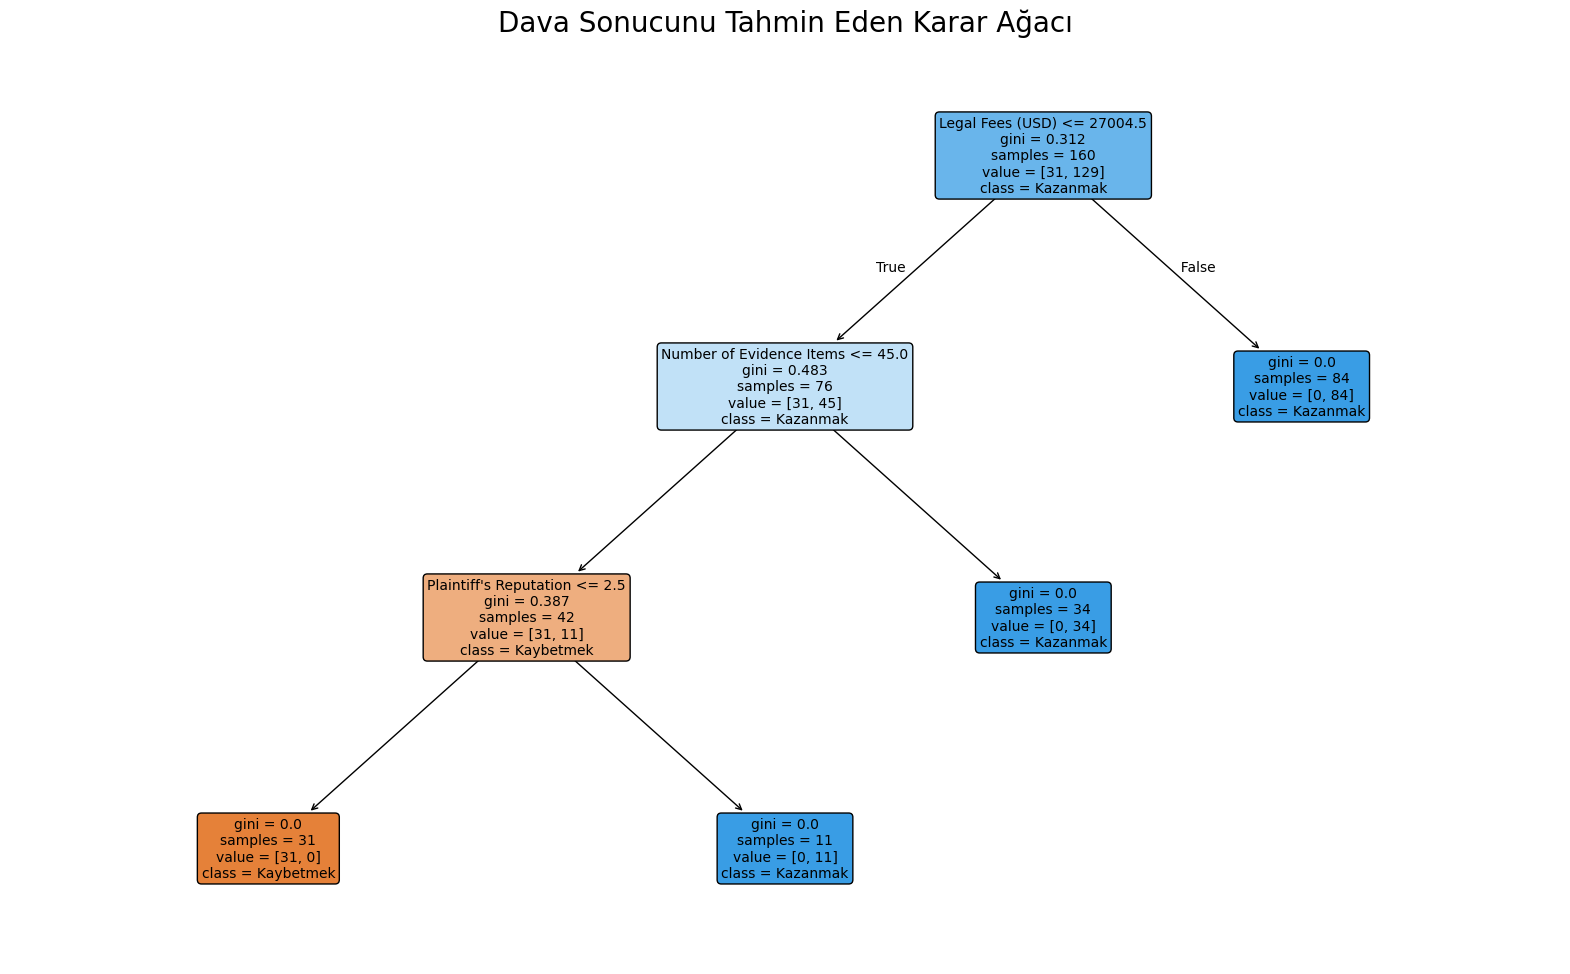

In [11]:
print("--- Karar Ağacı Görselleştirmesi ---")
plt.figure(figsize=(20, 12))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['Kaybetmek', 'Kazanmak'], 
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Dava Sonucunu Tahmin Eden Karar Ağacı", fontsize=20)
plt.show()

### Analiz ve Yorumlama

*Bu görsel, modelimizin "beyninin" bir haritası gibidir. Bir davayla karşılaştığında hangi adımları izleyerek karar verdiğini bize gösterir.*

Önce her kutunun içindeki terimlerin ne anlama geldiğini anlayalım:

*   **Soru (Örn: `Legal Fees (USD) <= 27004.5`):** Modelin o an sorduğu Evet/Hayır sorusu.
*   **gini:** Kutunun ne kadar "karışık" olduğunu gösterir. `gini = 0.0` ise kutu tamamen "saftır", yani içindeki tüm davalar aynı sonuca sahiptir.
*   **samples:** O kutuya kaç tane dava örneğinin geldiğini söyler.
*   **value = [Kaybetmek, Kazanmak]:** Bu örneklerin kaç tanesinin "Kaybetmek" ve kaç tanesinin "Kazanmak" olduğunu belirtir.
*   **class:** O kutuya düşen bir davanın sonucunun ne olacağını tahmin eder.
*   **Renkler:** Turuncu "Kaybetmek", mavi ise "Kazanmak" sınıfının baskın olduğunu gösterir. Renk ne kadar koyuysa, karar o kadar nettir.

#### Karar Ağacının Adım Adım Yorumlanması

Modelimiz, bir davayı sınıflandırmak için işe en tepedeki **kök düğümden**, yani en önemli sorudan başlar.

**1. Adım: Ana Soru**
*   **Soru:** "Bu davanın hukuk masrafları 27,004.5 USD'den **daha az veya eşit mi?**"

Bu soruya verilen cevaba göre yol ikiye ayrılır:

---
**2. Adım (Sağ Yol - Masraflar Yüksekse)**
*   **Cevap:** **Hayır** (False), yani masraflar 27,004.5 USD'den **fazla**.
*   **Karar:** Model bizi doğrudan en sağdaki koyu mavi kutuya yönlendirir. Bu kutudaki 84 davanın tamamı "Kazanmak" olarak sonuçlanmış.
*   **Öğrenilen Kural 1:** **Eğer bir davanın hukuk masrafları yüksekse, o dava kazanılır.** Model başka hiçbir şeye bakmadan bu kararı verir.

---
**3. Adım (Sol Yol - Masraflar Düşükse)**
*   **Cevap:** **Evet** (True), yani masraflar 27,004.5 USD'den **az**.
*   **Durum:** Modelin kafası hala karışık. Bu yola gelen 76 davanın 31'i kaybedilmiş, 45'i kazanılmış. Bu yüzden ikinci bir soru soruyor:
*   **İkinci Soru:** "Peki, delil sayısı 45'ten **daha az veya eşit mi?**"

Yol tekrar ikiye ayrılır:

---
**4. Adım (Delil Sayısı Çoksa)**
*   **Cevap:** **Hayır** (False), yani delil sayısı 45'ten **fazla**.
*   **Karar:** Model, ortadaki mavi kutuya ulaşır. Buradaki 34 davanın da tamamı kazanılmış.
*   **Öğrenilen Kural 2:** **Masraflar düşük olsa bile, eğer delil sayısı çoksa dava yine kazanılır.**

---
**5. Adım (Delil Sayısı Azsa)**
*   **Cevap:** **Evet** (True), yani delil sayısı 45'ten **az**.
*   **Durum:** Bu en kritik nokta. Buraya gelen 42 davanın 31'i kaybedilmiş. Model son bir eleme sorusu sorar:
*   **Üçüncü Soru:** "Davacının itibarı 2.5'ten **daha az veya eşit mi?**" (Yani, itibarı Düşük veya Orta mı?)

Ve nihai karar:

---
**6. Adım (İtibar Düşük/Orta ise)**
*   **Cevap:** **Evet** (True).
*   **Karar:** En soldaki koyu turuncu kutu. Buradaki 31 davanın tamamı "Kaybetmek" ile sonuçlanmış.
*   **Öğrenilen Kural 3:** **Masraflar az, delil sayısı az ve davacının itibarı da yüksek değilse, bu dava kaybedilir.**

---
**7. Adım (İtibar Yüksekse)**
*   **Cevap:** **Hayır** (False), yani itibar Yüksek (3).
*   **Karar:** Ortadaki son mavi kutu. Buradaki 11 davanın tamamı kazanılmış.
*   **Öğrenilen Kural 4:** **Masraflar ve delil sayısı az olsa bile, eğer davacının itibarı yüksekse, bu durum tek başına davayı kazandırmaya yeter.**

#### Genel Özet

Bu ağaç bize şunu gösteriyor: Modelimiz, dava sonucunu tahmin etmek için en önemli kriterin **hukuk masrafları** olduğunu öğrenmiş. Eğer masraflar yüksekse, dava büyük ihtimalle kazanılıyor. Eğer masraflar düşükse, bu sefer **delil sayısına**, o da yetersizse son olarak **davacının itibarına** bakarak nihai kararını veriyor.

Bu kurallar size de tanıdık geldi mi? Elbette, çünkü bunlar tam olarak bizim `Outcome` sütununu oluştururken kullandığımız mantığın model tarafından "keşfedilmiş" hali. Yani bu görsel, modelin görevi mükemmel anladığını ve uyguladığını gösteren bir başarı kanıtı.

Her şey en tepedeki **kök düğümden** başlar. Bu, modelin bir davayı sınıflandırmak için sorduğu **en önemli sorudur**.

**1. Adım: Ana Soru**

*   **Soru:** "Bu davanın hukuk masrafları (`Legal Fees`) 27,004.5 USD'den **az veya eşit mi?**"
*   **Durum:** Başlangıçta 160 davamız var. Bunların 31'i "Kaybetmek", 129'u "Kazanmak" (`value = [31, 129]`).

Şimdi bu soruya verilen cevaba göre ikiye ayrılıyoruz:

---

**2. Adım (Sağ Tarafa Giden Yol): Masraflar YÜKSEKSE**

*   **Cevap:** **HAYIR** (False oku), yani masraflar 27,004.5 USD'den **fazla**.
*   **Sonuç:** Model bizi doğrudan en sağdaki masmavi kutuya götürür. Bu kutu bir "yaprak"tır, yani karar burada verilir.
    *   **İçerik:** Buraya 84 dava gelmiş ve bunların 0'ı Kaybetmek, 84'ü Kazanmak (`value = [0, 84]`).
    *   **Yorum:** Bu çok net bir kuraldır. Gini değeri 0.0, yani hiç karışıklık yok.
    *   **ÖĞRENİLEN KURAL 1:** **Eğer bir davanın hukuk masrafları yüksekse, o dava kazanılır.** Başka hiçbir şeye bakmaya gerek yok.

---

**3. Adım (Sol Tarafa Giden Yol): Masraflar DÜŞÜKSE**

*   **Cevap:** **EVET** (True oku), yani masraflar 27,004.5 USD'den **az**.
*   **Durum:** Modelin kafası hala karışık. Bu yola 76 dava gelmiş, 31'i Kaybetmek, 45'i Kazanmak. Uzmanımız ikinci sorusunu soruyor:
*   **İkinci Soru:** "Peki, delil sayısı (`Number of Evidence Items`) 45'ten **az veya eşit mi?**"

Bu soruya göre yol tekrar ikiye ayrılıyor:

---

**4. Adım (Delil Sayısı ÇOKSA)**

*   **Cevap:** **HAYIR** (False oku), yani delil sayısı 45'ten **fazla**.
*   **Sonuç:** Model bizi ortadaki mavi yaprak düğüme götürür.
    *   **İçerik:** Buraya 34 dava gelmiş ve hepsi kazanmış (`value = [0, 34]`). Gini yine 0.0.
    *   **ÖĞRENİLEN KURAL 2:** **Masraflar düşük olsa bile, eğer delil sayısı çoksa dava yine kazanılır.**

---

**5. Adım (Delil Sayısı AZSA)**

*   **Cevap:** **EVET** (True oku), yani delil sayısı 45'ten **az**.
*   **Durum:** Uzmanın son bir soruya daha ihtiyacı var. Bu yola 42 dava gelmiş (31'i Kaybetmek, 11'i Kazanmak). Bu en karışık nokta.
*   **Üçüncü ve Son Soru:** "Peki, davacının itibarı (`Plaintiff's Reputation`) 2.5'ten **az veya eşit mi?**" (Yani itibarı Düşük (1) veya Orta (2) mı?)

Ve son karar:

---

**6. Adım (İtibar DÜŞÜK veya ORTAYSA)**

*   **Cevap:** **EVET** (True oku).
*   **Sonuç:** En soldaki turuncu yaprak düğüm.
    *   **İçerik:** Buraya 31 dava gelmiş ve hepsi kaybetmiş (`value = [31, 0]`). Gini 0.0.
    *   **ÖĞRENİLEN KURAL 3:** **Masraflar az, delil sayısı az ve davacının itibarı da yüksek değilse, bu dava kaybedilir.**

---

**7. Adım (İtibar YÜKSEKSE)**

*   **Cevap:** **HAYIR** (False oku), yani itibar Yüksek (3).
*   **Sonuç:** Ortadaki son mavi yaprak düğüm.
    *   **İçerik:** Buraya 11 dava gelmiş ve hepsi kazanmış (`value = [0, 11]`). Gini 0.0.
    *   **ÖĞRENİLEN KURAL 4:** **Masraflar ve delil sayısı az olsa bile, eğer davacının itibarı yüksekse dava yine de kazanılır.**

Bu ağaç bize şunu söylüyor: Model, bir davanın sonucunu tahmin etmek için **en önemli kriterin hukuk masrafları** olduğunu öğrendi. Eğer masraflar yüksekse, dava büyük ihtimalle kazanılıyor. Eğer masraflar düşükse, bu sefer **delil sayısına** bakıyor. O da azsa, son olarak **davacının itibarına** bakarak nihai kararını veriyor.

Bu kurallar size tanıdık geldi mi? Evet, çünkü bunlar tam olarak bizim `Outcome` sütununu oluştururken kullandığımız medyan ve itibar mantığının model tarafından "keşfedilmiş" halidir. Yani bu görsel, modelinizin görevini mükemmel bir şekilde anladığını ve uyguladığını gösteren bir başarı kanıtıdır.